<a href="https://colab.research.google.com/github/raulsomazabracho/Web-Scrapping/blob/main/Extracci%C3%B3n_Pitchfork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extraer info de mejores canciones de Pitchfork
https://pitchfork.com/features/lists-and-guides/the-200-best-albums-of-the-2010s/

# Importamos Librerias

In [ ]:
# Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import requests

# Conexión con la Pagina

In [ ]:
url = 'https://pitchfork.com/reviews/best/tracks/?page=1'

In [ ]:
response = requests.get(url)
response

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

# Creación de las variables

In [ ]:
nombre = []
artista = []
genero = []

# Extracción de la Data

## Inspección

Para lo siguiente debemos inspeccionar la pagina web y ver en cual linea de codigo está la informacion de la pelicula que requerimos

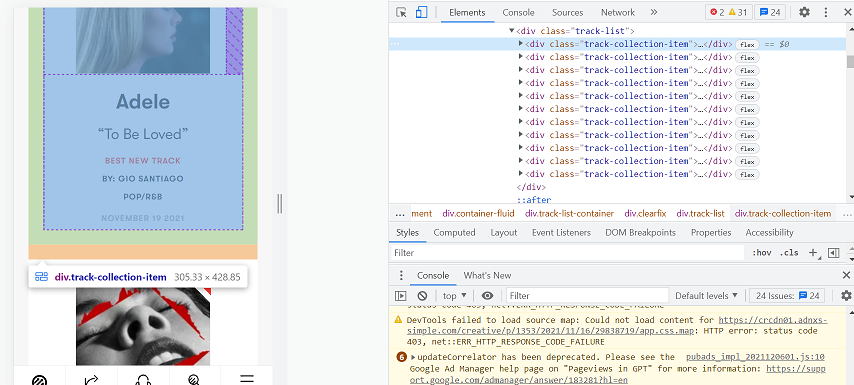

## Validación

In [ ]:
#hay que ver donde se encuentra la info y con cual ttulo en este caso es en div y con el titulo lister...
#info_canciones = soup.findAll('div', attrs = {'class':'track-collection-item'})
info_canciones = soup.find_all('div', attrs = {'class':'track-collection-item__details'})

In [ ]:
info_canciones

[<div class="track-collection-item__details"><div class="row"><a class="track-collection-item__track-link" href="/reviews/tracks/adele-to-be-loved/"><ul class="artist-list"><li>Adele</li></ul><h2 class="track-collection-item__title">“To Be Loved”</h2></a><div class="track-collection-item__meta"><a class="bnm" href="/reviews/best/tracks/">Best New Track</a><div class="publish-info"><ul class="authors"><li><a class="linked display-name display-name--linked" href="/staff/gio-santiago/"><span class="by">by: </span>Gio Santiago</a></li></ul><ul class="genre-list genre-list--before track-meta__genre-list"><li class="genre-list__item"><a class="genre-list__link" href="/reviews/tracks/?genre=pop">Pop/R&amp;B</a></li></ul></div><time class="pub-date" datetime="2021-11-19T19:50:30" title="Fri, 19 Nov 2021 19:50:30 GMT">November 19 2021</time></div></div></div>,
 <div class="track-collection-item__details"><div class="row"><a class="track-collection-item__track-link" href="/reviews/tracks/mitski-

## Consolidación

Iteramos la lista creada buscando solo la info que queremos dentro de cada clase segu n su locacion--> puede ser ul,h2,a,etc... hay que verlo dentro del codigo HTML

In [ ]:
from typing import Text
for i in info_canciones:
  artista_cancion = i.find('ul', class_='artist-list').text
  artista.append(artista_cancion)

  nombre_cancion = i.find('h2', class_ = 'track-collection-item__title').text.replace('“','').replace('”','')
  nombre.append(nombre_cancion)

  genero_cancion = i.find('a', class_= 'genre-list__link').text
  genero.append(genero_cancion)


#Creación del Dataframe

In [ ]:
musica = pd.DataFrame({'Artista':artista,'Nombre':nombre,'Genero':genero})

In [ ]:
musica

,Artista,Nombre,Genero
0,Adele,To Be Loved,Pop/R&B
1,Mitski,The Only Heartbreaker,Rock
2,Jlin,Embryo,Electronic
3,The War on Drugs,I Don’t Live Here Anymore,Rock
4,Snail Mail,Valentine,Rock
5,Water From Your Eyes,Quotations,Rock
6,Big Thief,Little Things,Rock
7,Indigo De Souza,Hold U,Rock
8,Low,Days Like These,Rock
9,Megan Thee Stallion,Thot Shit,Rap
